In [1]:
import pandas as pd
import numpy as np
import os
import pickle

In [2]:
def pickle_load(dir, filename):
  # open a file, where you stored the pickled data
  file = open(os.path.join(dir,filename), 'rb')

  # dump information to that file
  data = pickle.load(file)

  # close the file
  file.close()
  return data

In [3]:
data = pd.read_csv("predictions 3.2.csv")
label = pickle_load("", "test_data_y.pk")

In [4]:
data = np.array(data)
label = np.array(label)
print(data.shape, label.shape)

(1000, 513) (1000,)


In [5]:
# Deleting first colum (Data serial)
data = data[:, 1:]
print(data.shape, label.shape)

(1000, 512) (1000,)


In [6]:
# applying Information Gain
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfe = RFE(RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=200)
importance = rfe.fit(data, label)

In [7]:
print(rfe.support_)

print(rfe.ranking_)

[False False  True False  True  True False False False False False False
  True False  True False False  True False  True False  True False False
 False False False False  True False  True False False False False False
 False False False False False  True  True  True  True False  True  True
  True  True False  True  True False False  True False False  True  True
 False False False False False False False  True False  True  True  True
  True  True False  True False False False False False False  True False
  True False False False  True  True False False  True  True  True  True
  True False  True  True False  True  True False False  True  True False
  True False  True False False  True False False  True  True  True  True
  True False False  True  True False False False False False False False
 False  True False False False False False False False False  True  True
 False False  True False  True False False False False False  True  True
 False  True False  True False False False  True  T

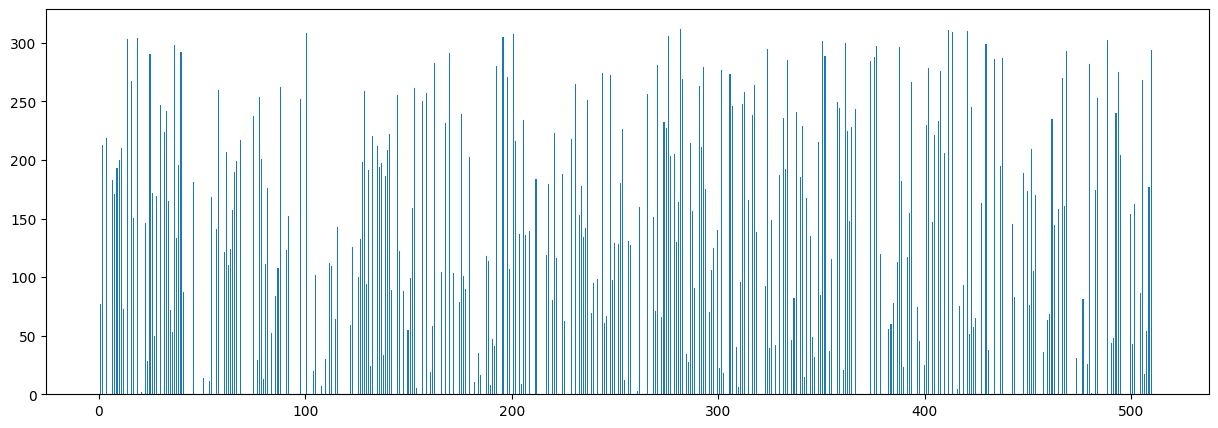

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot()
plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(len(rfe.ranking_))

# plot
# fig, ax = plt.subplots()

plt.bar(x, rfe.ranking_[:], width=1, edgecolor="white", linewidth=0.7)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 10),
#        ylim=(0, 1), yticks=np.arange(1, 10))

plt.show()